<a href="https://colab.research.google.com/github/bartolomeoadrian/computer-vision/blob/main/10_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga de YOLO

In [2]:
!pip -q install ultralytics opencv-python pillow

# Cargar librerías

In [3]:
import requests
import os, glob
from ultralytics import YOLO
from IPython.display import Image, display

# Descargar el modelo

In [6]:
model = YOLO('yolo11n.pt')

# Entrenar el modelo

In [10]:
results = model.train(
    data='VOC.yaml',
    epochs=1,
    imgsz=384,
    workers=2,
    val=False,
    classes=[6],
    cache='ram',
    rect=True,
    mosaic=0.0,
    copy_paste=0.0,
    mixup=0.0,
    hsv_h=0.0, hsv_s=0.0, hsv_v=0.0,
    freeze=10,
    project='cars_yolo11',
    name='voc_car_only_fast'
)

Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=[6], close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=VOC.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, imgsz=384, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=voc_car_only_fast, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False

train: Scanning /content/datasets/VOC/labels/train2007.cache... 16551 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16551/16551 [00:00<?, ?it/s]


WARNING ⚠️ train: 7.3GB RAM required to cache images with 50% safety margin but only 4.4/12.7GB available, not caching images
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 27.0±9.6 MB/s, size: 65.6 KB)


val: Scanning /content/datasets/VOC/labels/test2007.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (1.5GB RAM): 100%|██████████| 4952/4952 [00:29<00:00, 170.58it/s]


Plotting labels to cars_yolo11/voc_car_only_fast/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 384 train, 384 val
Using 0 dataloader workers
Logging results to cars_yolo11/voc_car_only_fast
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G     0.8461      9.652     0.9002          0        160: 100%|██████████| 1035/1035 [43:42<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [07:09<00:00,  2.77s/it]


                   all       4952       1201      0.766      0.715       0.79       0.54

1 epochs completed in 0.849 hours.
Optimizer stripped from cars_yolo11/voc_car_only_fast/weights/last.pt, 5.4MB
Optimizer stripped from cars_yolo11/voc_car_only_fast/weights/best.pt, 5.4MB

Validating cars_yolo11/voc_car_only_fast/weights/best.pt...
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,586,052 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [06:11<00:00,  2.40s/it]


                   all       4952       1201      0.764      0.716       0.79      0.539
                   car        721       1201      0.764      0.716       0.79      0.539
Speed: 0.7ms preprocess, 72.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to cars_yolo11/voc_car_only_fast


# Prueba de la red

In [11]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,586,052 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 32.7±9.3 MB/s, size: 117.3 KB)


val: Scanning /content/datasets/VOC/labels/test2007.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (1.5GB RAM): 100%|██████████| 4952/4952 [00:30<00:00, 161.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [06:08<00:00,  1.19s/it]


                   all       4952       1201      0.768      0.714      0.789       0.54
                   car        721       1201      0.768      0.714      0.789       0.54
Speed: 0.5ms preprocess, 71.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to cars_yolo11/voc_car_only_fast2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa579911e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.02502

# Prediccion


image 1/1 /content/car.jpg: 384x640 5 cars, 172.1ms
Speed: 3.9ms preprocess, 172.1ms inference, 18.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to cars_yolo11/voc_car_only_fast3


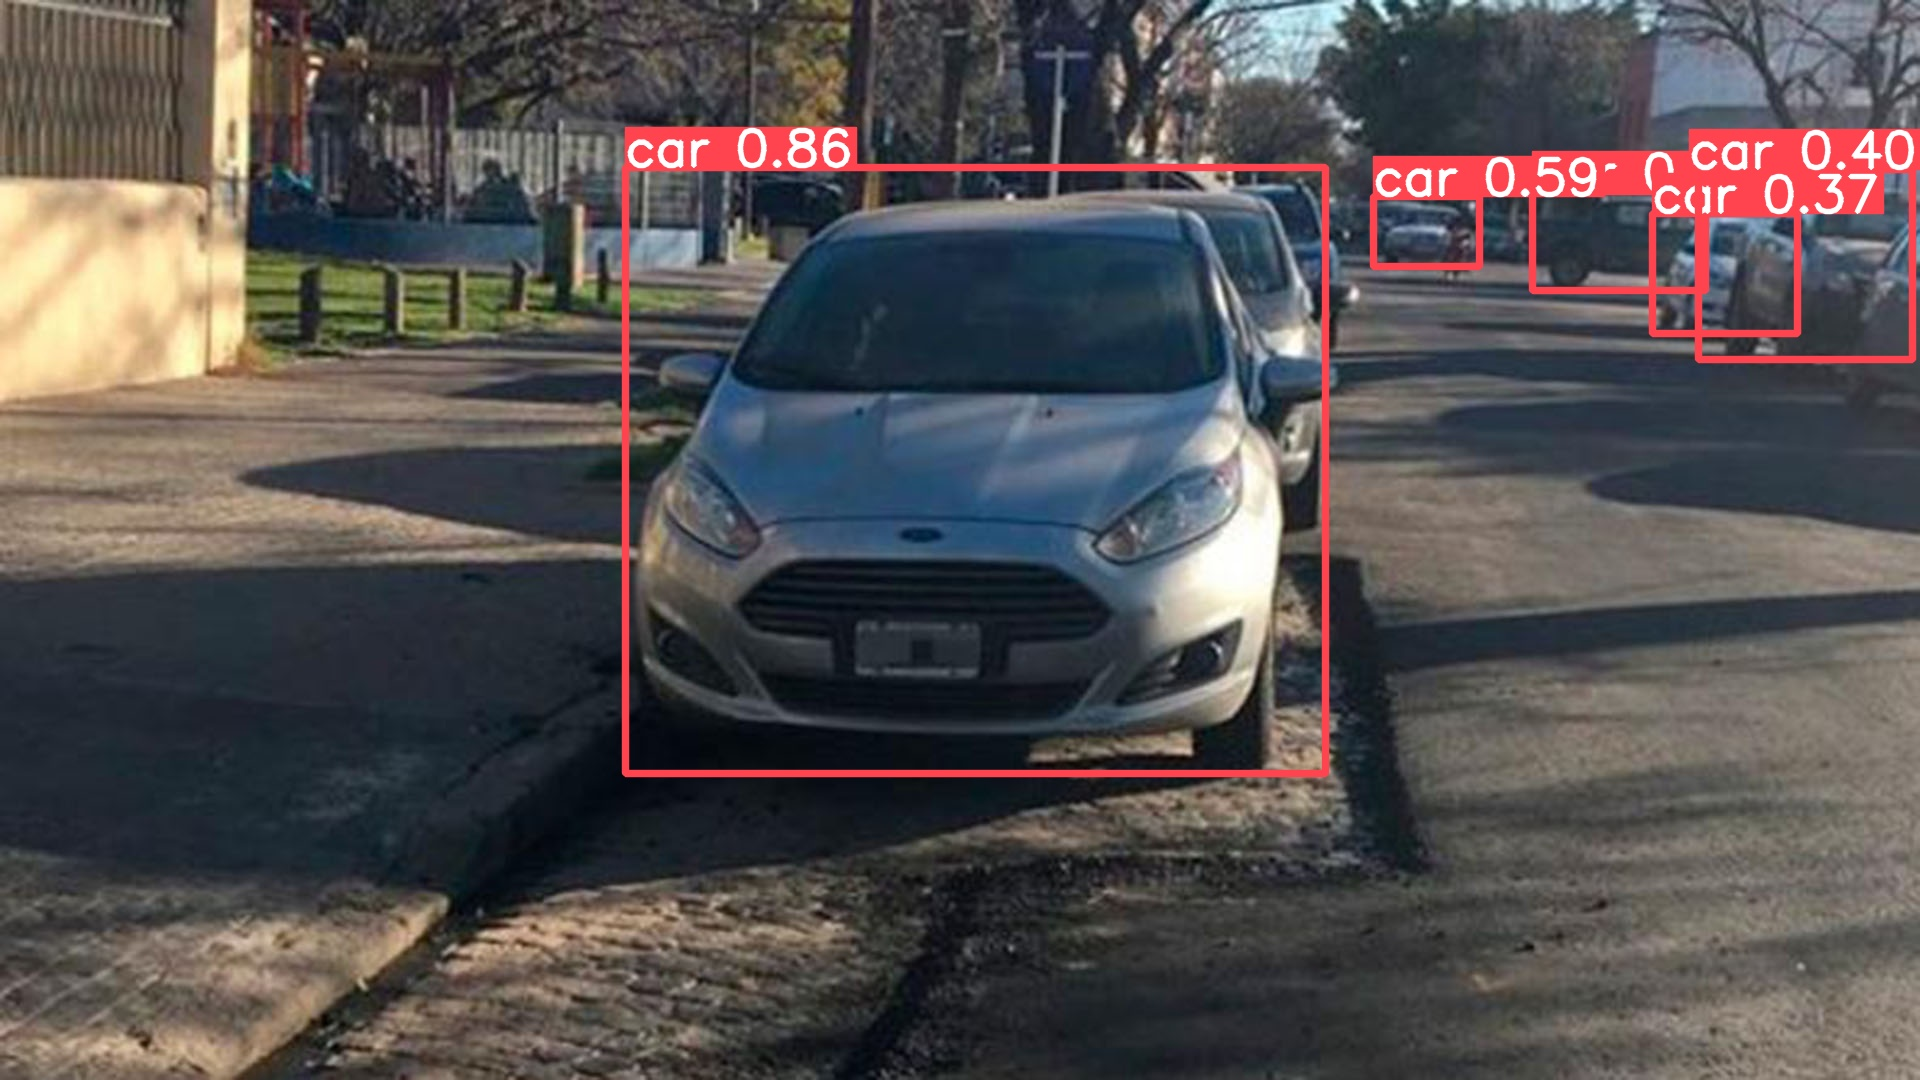

In [12]:
image_url = 'https://raw.githubusercontent.com/bartolomeoadrian/computational-vision/refs/heads/main/assets/images/car.jpg'

response = requests.get(image_url)
with open('car.jpg', 'wb') as f:
    f.write(response.content)

pred = model.predict(source='car.jpg', conf=0.25, imgsz=640, save=True)

save_dir = pred[0].save_dir

annotated = os.path.join(save_dir, os.path.basename('car.jpg'))

if annotated:
    display(Image(filename=annotated))
else:
    print("No se encontró la imagen anotada, revisá el directorio de salida.")